# Linear Regression

### Exploratory Data Analysis

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Reading the dataset into a dataframe
flights = pd.read_csv("flights.csv")
flights.head()

print(f"""N. of observations: {flights.shape[0]}
N. of features: {flights.shape[1]}""")

print(
    f"""\nN. of different airlines: {len(flights["AIRLINE"].drop_duplicates())}""")
# Getting the count of flights for each airline
q2 = flights["AIRLINE"].value_counts().to_frame().reset_index()
q2.columns = ["Airline", "N of flights"]
q2

print(
    f"""N. of different airlines: {len(flights["AIRLINE"].drop_duplicates())}""")
# Getting the count of flights for each airline
q2 = flights["AIRLINE"].value_counts().to_frame().reset_index()
q2.columns = ["Airline", "N of flights"]
q2

print(f"""\nDEPARTURES
    mean = {round(flights["DEPARTURE_DELAY"].mean(), 2)}
    median = {flights["DEPARTURE_DELAY"].median()}
ARRIVALS
    mean = {round(flights["ARRIVAL_DELAY"].mean(), 2)}
    median = {flights["ARRIVAL_DELAY"].median()}""")

dep_arr_corr = flights.groupby(
    "AIRLINE")[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].corr().iloc[0::2, -1]
dep_arr_corr = dep_arr_corr.to_frame().reset_index()
dep_arr_corr = dep_arr_corr.drop("level_1", axis=1)
dep_arr_corr.columns = ["AIRLINE", "DEP - ARR DELAYS CORR"]

print("\nCorrelation between Departures and Arrivals")
print(dep_arr_corr)



N. of observations: 5821
N. of features: 31

N. of different airlines: 14
N. of different airlines: 14

DEPARTURES
    mean = 8.91
    median = -2.0
ARRIVALS
    mean = 3.99
    median = -5.0

Correlation between Departures and Arrivals
   AIRLINE  DEP - ARR DELAYS CORR
0       AA               0.903843
1       AS               0.901350
2       B6               0.946397
3       DL               0.943225
4       EV               0.941384
5       F9               0.979991
6       HA               0.960797
7       MQ               0.910737
8       NK               0.963796
9       OO               0.932795
10      UA               0.940811
11      US               0.935551
12      VX               0.923683
13      WN               0.943655


C:\Users\renat\AppData\Local\Temp\ipykernel_7528\2748136781.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, i+1)  # selecting the correct position for the plot


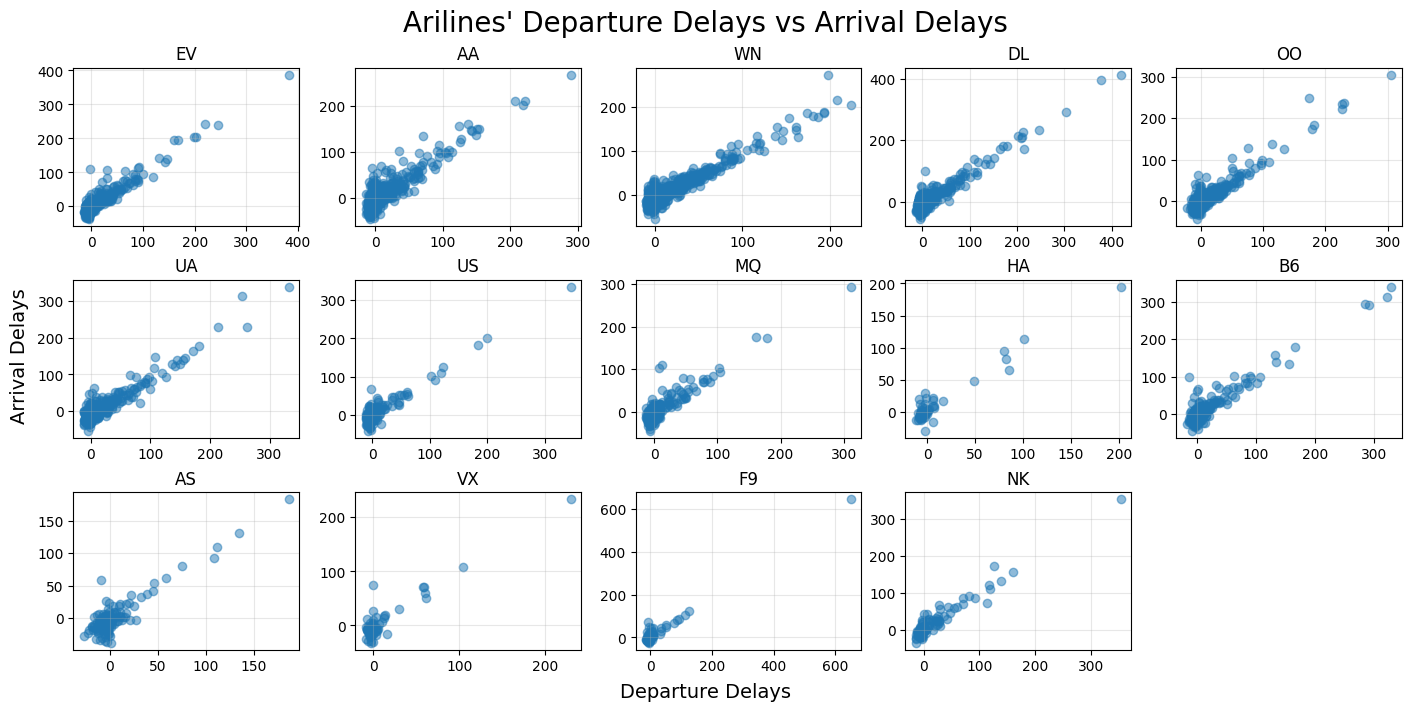

In [13]:
# Resetting the index
airlines = flights["AIRLINE"].drop_duplicates().reset_index(drop=True)

# Creating a figure with multiple axes for each airline showing the departure
# delays as x-axis and arrival delays as y-axis
fig, ax = plt.subplots(figsize=(14, 7), constrained_layout=True)
for i in range(0, len(airlines)):
    # getting individual airline
    airline = flights[flights["AIRLINE"] == airlines[i]]
    plt.subplot(3, 5, i+1)  # selecting the correct position for the plot
    x = airline["DEPARTURE_DELAY"]  # x-axis
    plt.scatter(airline["DEPARTURE_DELAY"],
                airline["ARRIVAL_DELAY"], alpha=0.5)
    plt.title(airlines[i])
    plt.grid(alpha=0.3)
    plt.plot()

plt.suptitle("Arilines' Departure Delays vs Arrival Delays",
             fontsize=20)
fig.supxlabel('Departure Delays', fontsize=14)
fig.supylabel('Arrival Delays', fontsize=14)

# Displaying measures of central tendency for each airline
delays = ["DEPARTURE_DELAY", "ARRIVAL_DELAY"]
for delay in delays:
    # print(delay)
    delay = flights[["AIRLINE", delay]]
    delay = delay.groupby("AIRLINE").describe()
    delay.columns = delay.columns.droplevel(0)
    delay = delay.sort_values(["50%"], ascending=False)
    delay = delay.reset_index()
    delay = delay.drop(["count", "mean", "std"], axis=1)
    # print(delay, "\n")

# Temp array to minimize verbose
departure_delay = flights[["ORIGIN_AIRPORT", "DEPARTURE_DELAY"]]


DEPARTURE_DELAY VS DISTANCE
    Correlation: 0.0237


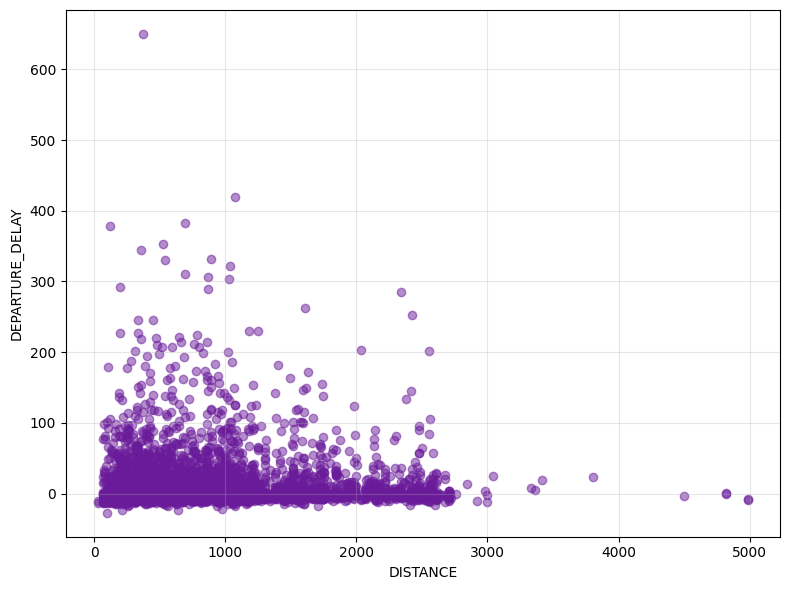

ARRIVAL_DELAY VS DISTANCE
    Correlation: -0.0279


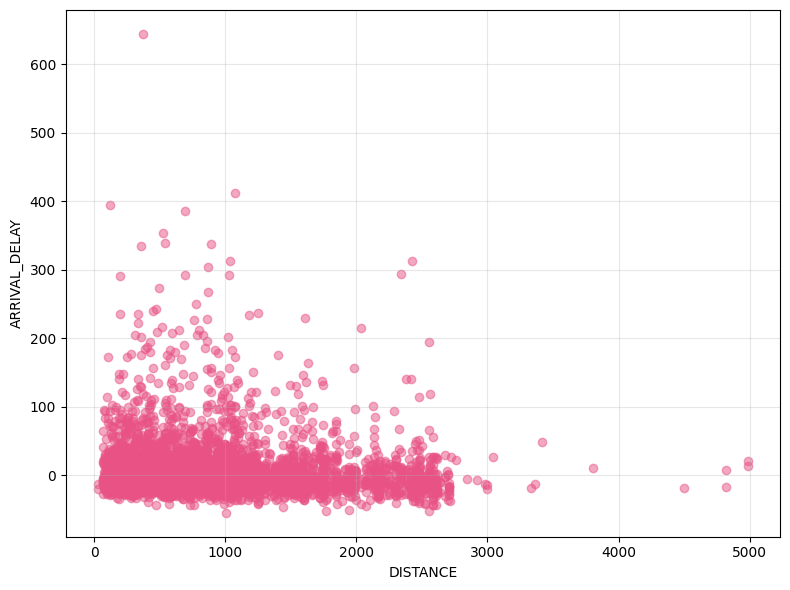

In [14]:
# Grouping by origin airport the caluclating the mean
# and then sorting the outcome
departure_delay = departure_delay.groupby("ORIGIN_AIRPORT").mean().round(2)
departure_delay = departure_delay.sort_values(
    "DEPARTURE_DELAY", ascending=False).head(10).reset_index()
departure_delay.columns = ["ORIGIN_AIRPORT", "MEAN DEPARTURE_DELAY"]

departure_delay

# Temp array to minimize verbose
delays = ["DEPARTURE_DELAY", "ARRIVAL_DELAY"]
colors = ["#6a1b9a", "#e85285"]

for i, delay in enumerate(delays):
    # Chart title
    print(f"""{delay} VS DISTANCE
    Correlation: {round(flights[delay].corr(flights["DISTANCE"]), 4)}""")
    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.scatter(flights["DISTANCE"], flights[delay],
                color=colors[i], alpha=0.5)
    plt.xlabel("DISTANCE")
    plt.ylabel(delay)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


DEPARTURE_DELAY VS DAY_OF_WEEK
             count      mean        std   min  25%  50%  75%    max
DAY_OF_WEEK                                                        
1            839.0  9.915375  35.839955 -17.0 -5.0 -1.0  8.0  382.0
2            802.0  8.978803  33.884519 -18.0 -5.0 -2.0  6.0  330.0
3            816.0  7.488971  30.602255 -16.0 -5.0 -2.0  6.0  345.0
4            862.0  9.475638  35.056665 -18.0 -4.0 -1.0  8.0  419.0
5            907.0  9.647189  32.645854 -16.0 -4.0 -1.0  8.0  311.0
6            704.0  7.100852  32.731370 -27.0 -5.0 -2.0  5.0  353.0
7            800.0  9.393750  38.059649 -23.0 -5.0 -1.0  9.0  650.0


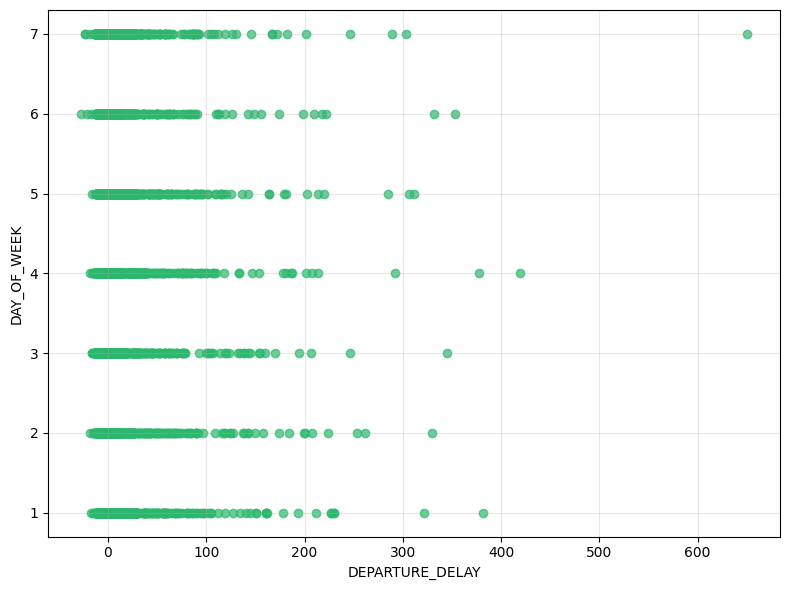

In [15]:
# Day of the week is categorical -> can't perform correlation
print("DEPARTURE_DELAY VS DAY_OF_WEEK")

# showing measures of central tendency
print(flights.groupby("DAY_OF_WEEK")["DEPARTURE_DELAY"].describe())

# Plotting departure delays per day of week as scatter instead of boxplot so outliers don't distort the plot.
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(flights["DEPARTURE_DELAY"], flights["DAY_OF_WEEK"],
            c="#2BB86D",
            alpha=0.7)
plt.xlabel("DEPARTURE_DELAY")
plt.ylabel("DAY_OF_WEEK")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

ARRIVAL_DELAY VS DISTANCE WHEN DEPARTURE_DELAY IS POSITIVE
    Correlation: -0.0949


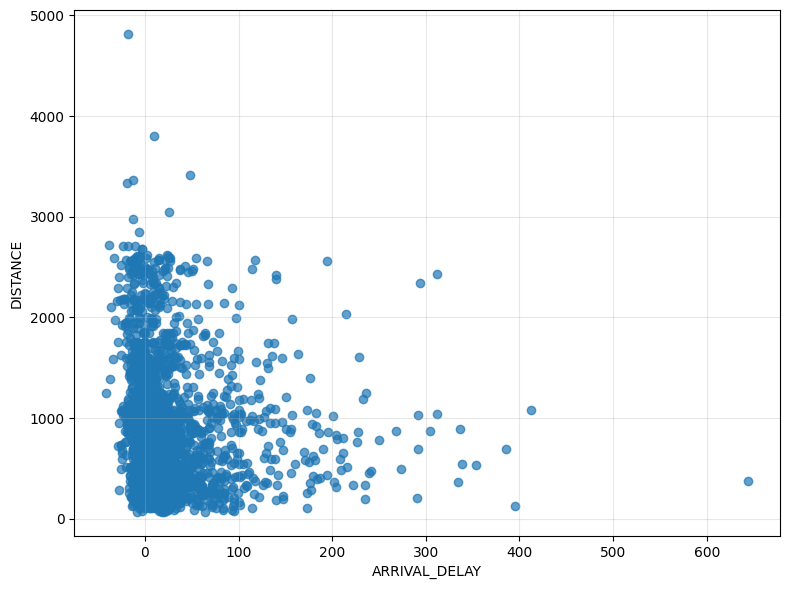

In [10]:
# Filtering only flights with a departure delay
pos_dep_delays = flights[flights["DEPARTURE_DELAY"]
                         > 0][["ARRIVAL_DELAY", "DISTANCE"]]

# Calculating correlation
corr = round(pos_dep_delays["ARRIVAL_DELAY"].corr(
    pos_dep_delays["DISTANCE"]), 4)
print(f"""ARRIVAL_DELAY VS DISTANCE WHEN DEPARTURE_DELAY IS POSITIVE
    Correlation: {corr}""")

# Plotting the relationship
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(pos_dep_delays["ARRIVAL_DELAY"],
            pos_dep_delays["DISTANCE"], alpha=0.7)
plt.xlabel("ARRIVAL_DELAY")
plt.ylabel("DISTANCE")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Axes: xlabel='ORIGIN_AIRPORT'>

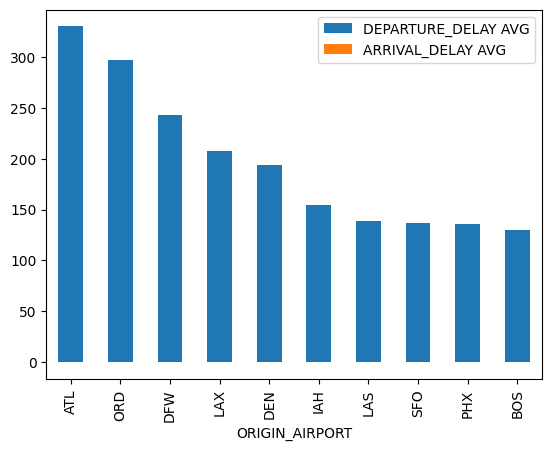

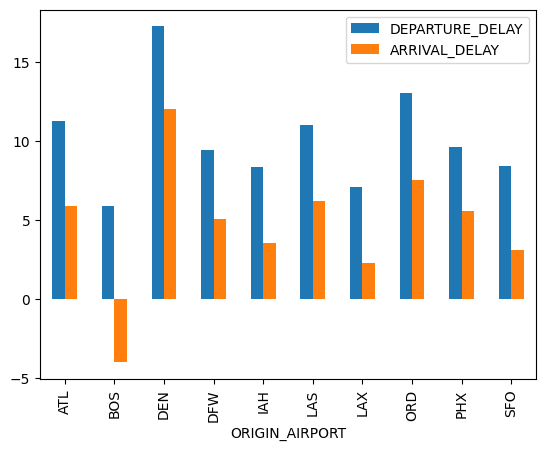

In [11]:
# Calculating the mean departure and arrival delays for each airline.
q11 = flights.groupby("AIRLINE")[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].mean()
q11.columns = ["DEPARTURE_DELAY AVG", "ARRIVAL_DELAY AVG"]
q11.plot(kind="bar")

# %%%
# Calculating the number of flights per origin airport and getting the top 10
q11 = flights["ORIGIN_AIRPORT"].value_counts().head(10)
q11.plot(kind="bar")

# %%%
# Calculating the mean departure and arrival delays for the top 10 origin airports 
# in terms of number of flights
q11_1 = flights[flights["ORIGIN_AIRPORT"].isin(q11.index)]
q11_1 = q11_1.groupby("ORIGIN_AIRPORT")[["DEPARTURE_DELAY", "ARRIVAL_DELAY"]].mean().head(10)
q11_1.plot(kind="bar")

### Linear Regression

The response variable is ARRIVAL DELAY. First, I'll remove all the missing data in the WEATHER DELAY column. Then, there shouldn't be any more missing values in the data set (except for the cancellation reason feature).

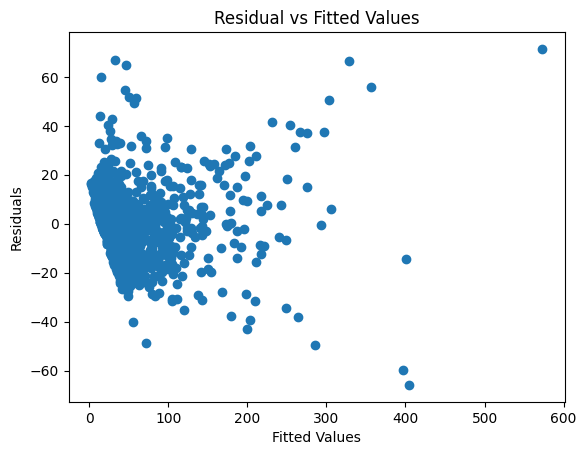

In [19]:
flights = flights.dropna(subset=["WEATHER_DELAY"])

# %%
# Build a regression model using all the observations, and the following
# predictors: [LATE AIRCRAFT DELA, AIR SYSTEM DELAY, WEATHER DELAY, DAY OF WEEK,
#  DEPARTURE TIME, DEPARTURE DELAY, DISTANCE, AIRLINE] a total of 9 predictors.
# (5pts)

# Predictors
# Converting categorical feature AIRLINE to dummy variables
X = flights[["LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY", "WEATHER_DELAY",
             "DAY_OF_WEEK", "DEPARTURE_TIME", "DEPARTURE_DELAY", "DISTANCE", "AIRLINE"]]
X = pd.get_dummies(X, columns=["AIRLINE"], drop_first=True)
X_int = sm.add_constant(X)  # adding constant column

# Response variable
y = flights["ARRIVAL_DELAY"]
# %%
# Perform model diagnostics. What do you observe? Explain. (5pts)

# Using sklearn model to create residual plot
linreg = LinearRegression()  # Instantiate
linreg.fit(X, y)

# Residuals plot
fitted_values = linreg.predict(X)
plt.scatter(fitted_values, flights["ARRIVAL_DELAY"] - fitted_values)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values')
plt.show()


Using the boxplot method, I'll remove the outliers in the ARRIVAL DELAY variable.

BEFORE


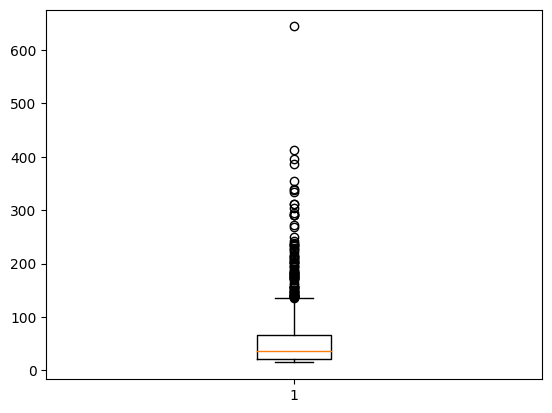

AFTER


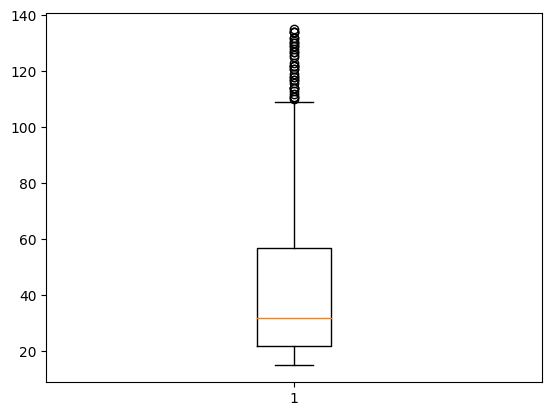

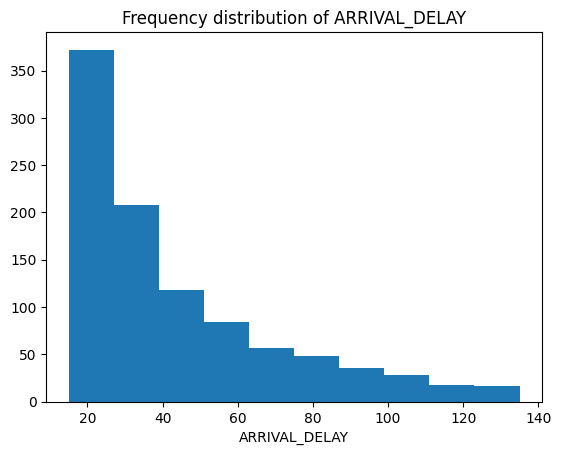

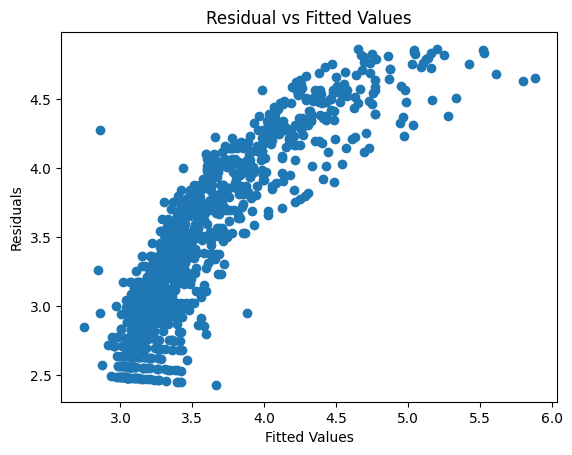

In [21]:
# Boxplot of arrival delay before dropping the otuliers
print("BEFORE")
fig, ax = plt.subplots()
ax.boxplot(flights["ARRIVAL_DELAY"])
plt.show()

# Getting q1 and q3 to calculate the IQR
q1 = np.quantile(flights["ARRIVAL_DELAY"], 0.25)
q3 = np.quantile(flights["ARRIVAL_DELAY"], 0.75)
iqr = q3 - q1
upper_whisker = q3 + (1.5 * iqr)

# Removing outliers using the boxplot method
flights_noOut = flights[flights["ARRIVAL_DELAY"] <= upper_whisker]
flights_noOut.shape

# Boxplot of arrival delay after dropping the otuliers
print("AFTER")
fig, ax = plt.subplots()
ax.boxplot(flights_noOut["ARRIVAL_DELAY"])
plt.show()

# %%
# Refit the linear regression model, but now with log(ARRIVAL DELAY) as your response. Also, remove the non-significant predictors from the previous model (with p-values larger than 0.05). (Remember that when removing non-significant predictors one can only eliminate one variable per step, but for now we will ignore this rule and remove everything in one step.) (5pts)

# Predictors
X = flights_noOut[["LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY",
                   "WEATHER_DELAY", "DEPARTURE_TIME", "DEPARTURE_DELAY", "AIRLINE"]]
# Converting categorical feature AIRLINE to dummy variables
X = pd.get_dummies(X, columns=["AIRLINE"], drop_first=True)
X = X[["LATE_AIRCRAFT_DELAY", "AIR_SYSTEM_DELAY", "WEATHER_DELAY",
       "DEPARTURE_TIME", "DEPARTURE_DELAY", "AIRLINE_UA", "AIRLINE_WN"]]
X_int = sm.add_constant(X)

# Response variable
y = np.log(flights_noOut["ARRIVAL_DELAY"])


# %%
# Perform model diagnostics. Did anything improve? (5pts)

# Histogram of ARRIVAL_DELAY
plt.hist(flights_noOut["ARRIVAL_DELAY"])
plt.title("Frequency distribution of ARRIVAL_DELAY")
plt.xlabel("ARRIVAL_DELAY")
plt.show()

linreg4 = LinearRegression()
linreg4.fit(X, y)

### Residual plot using sklearn
fitted_values = linreg4.predict(X)
plt.scatter(fitted_values, np.log(flights_noOut["ARRIVAL_DELAY"] - fitted_values))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values')
plt.show()
